In [ ]:
# Author: Jake Vanderplas <jakevdp@cs.washington.edu>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_species_distributions
from sklearn.neighbors import KernelDensity

# if basemap is available, we'll use it.
# otherwise, we'll improvise later...
try:
    from mpl_toolkits.basemap import Basemap

    basemap = True
except ImportError:
    basemap = False


def construct_grids(batch):
    """Construct the map grid from the batch object

    Parameters
    ----------
    batch : Batch object
        The object returned by :func:`fetch_species_distributions`

    Returns
    -------
    (xgrid, ygrid) : 1-D arrays
        The grid corresponding to the values in batch.coverages
    """
    # x,y coordinates for corner cells
    xmin = batch.x_left_lower_corner + batch.grid_size
    xmax = xmin + (batch.Nx * batch.grid_size)
    ymin = batch.y_left_lower_corner + batch.grid_size
    ymax = ymin + (batch.Ny * batch.grid_size)

    # x coordinates of the grid cells
    xgrid = np.arange(xmin, xmax, batch.grid_size)
    # y coordinates of the grid cells
    ygrid = np.arange(ymin, ymax, batch.grid_size)

    return (xgrid, ygrid)


# Get matrices/arrays of species IDs and locations
data = fetch_species_distributions()
species_names = ["Bradypus Variegatus", "Microryzomys Minutus"]

Xtrain = np.vstack([data["train"]["dd lat"], data["train"]["dd long"]]).T
ytrain = np.array(
    [d.decode("ascii").startswith("micro") for d in data["train"]["species"]],
    dtype="int",
)
Xtrain *= np.pi / 180.0  # Convert lat/long to radians

# Set up the data grid for the contour plot
xgrid, ygrid = construct_grids(data)
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()

xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = xy[land_mask]
xy *= np.pi / 180.0

# Plot map of South America with distributions of each species
fig = plt.figure()
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

for i in range(2):
    plt.subplot(1, 2, i + 1)

    # construct a kernel density estimate of the distribution
    print(" - computing KDE in spherical coordinates")
    kde = KernelDensity(
        bandwidth=0.04, metric="haversine", kernel="gaussian", algorithm="ball_tree"
    )
    kde.fit(Xtrain[ytrain == i])

    # evaluate only on the land: -9999 indicates ocean
    Z = np.full(land_mask.shape[0], -9999, dtype="int")
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)

    if basemap:
        print(" - plot coastlines using basemap")
        m = Basemap(
            projection="cyl",
            llcrnrlat=Y.min(),
            urcrnrlat=Y.max(),
            llcrnrlon=X.min(),
            urcrnrlon=X.max(),
            resolution="c",
        )
        m.drawcoastlines()
        m.drawcountries()
    else:
        print(" - plot coastlines from coverage")
        plt.contour(
            X, Y, land_reference, levels=[-9998], colors="k", linestyles="solid"
        )
        plt.xticks([])
        plt.yticks([])

    plt.title(species_names[i])

plt.show()

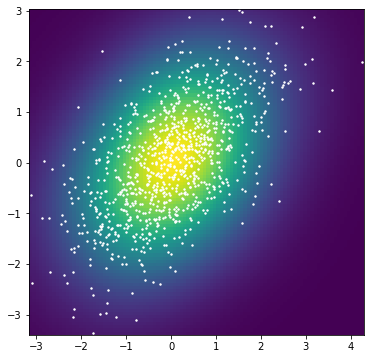

In [2]:
from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, xbins=100j, ybins=100j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)


import numpy as np
import matplotlib.pyplot as plt

m1 = np.random.normal(size=1000)
m2 = np.random.normal(scale=0.5, size=1000)

x, y = m1 + m2, m1 - m2

xx, yy, zz = kde2D(x, y, 1.0)

plt.figure(figsize=(6, 6))
plt.pcolormesh(xx, yy, zz)
plt.scatter(x, y, s=2, facecolor='white')
plt.show()

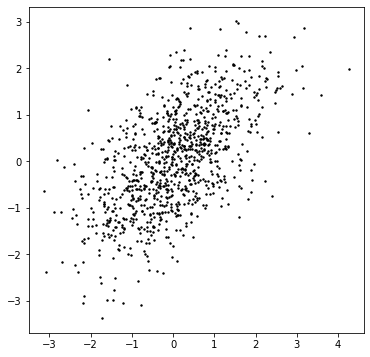

In [4]:
plt.figure(figsize=(6, 6))
#plt.pcolormesh(xx, yy, zz)
plt.scatter(x, y, s=2, facecolor='black')

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
n_components = 3
X, truth = make_blobs(n_samples=300, centers=n_components, 
                      cluster_std = [2, 1.5, 1], 
                      random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=50, c = truth)
plt.title(f"Example of a mixture of {n_components} distributions")
plt.xlabel("x")
plt.ylabel("y");

## ggplot2 3.3.5

In [ ]:
geom_density_2d(
  mapping = NULL,
  data = NULL,
  stat = "density_2d",
  position = "identity",
  ...,
  contour_var = "density",
  lineend = "butt",
  linejoin = "round",
  linemitre = 10,
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)

geom_density_2d_filled(
  mapping = NULL,
  data = NULL,
  stat = "density_2d_filled",
  position = "identity",
  ...,
  contour_var = "density",
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)

stat_density_2d(
  mapping = NULL,
  data = NULL,
  geom = "density_2d",
  position = "identity",
  ...,
  contour = TRUE,
  contour_var = "density",
  n = 100,
  h = NULL,
  adjust = c(1, 1),
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)

stat_density_2d_filled(
  mapping = NULL,
  data = NULL,
  geom = "density_2d_filled",
  position = "identity",
  ...,
  contour = TRUE,
  contour_var = "density",
  n = 100,
  h = NULL,
  adjust = c(1, 1),
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)

# plot_contour

In [ ]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'



def bivariate_normal(X, Y, sigmax=1.0, sigmay=1.0,
                     mux=0.0, muy=0.0, sigmaxy=0.0):
    """
    Bivariate Gaussian distribution for equal shape *X*, *Y*.
    See `bivariate normal
    <http://mathworld.wolfram.com/BivariateNormalDistribution.html>`_
    at mathworld.
    """
    Xmu = X-mux
    Ymu = Y-muy

    rho = sigmaxy/(sigmax*sigmay)
    z = Xmu**2/sigmax**2 + Ymu**2/sigmay**2 - 2*rho*Xmu*Ymu/(sigmax*sigmay)
    denom = 2*np.pi*sigmax*sigmay*np.sqrt(1-rho**2)
    return np.exp(-z/(2*(1-rho**2))) / denom

In [ ]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
#Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)

Z1 = bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)

#scipy.stats.multivariate_normal()
#mlab.bivariate_normal
#rv1 = scipy.stats.multivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
#Z1 = rv.pdf(np.dstack((X, Y)))
#rv2 = scipy.stats.multivariate_normal(X, Y, 1.5, 0.5, 1, 1)
#Z2 = rv.pdf(np.dstack((X, Y)))


#Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z2 = bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)


# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')


# contour labels can be placed manually by providing list of positions
# (in data coordinate). See ginput_manual_clabel.py for interactive
# placement.
plt.figure()
CS = plt.contour(X, Y, Z)
manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
plt.clabel(CS, inline=1, fontsize=10, manual=manual_locations)
plt.title('labels at selected locations')


# You can force all the contours to be the same color.
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k',  # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours dashed')

# You can set negative contours to be solid instead of dashed:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k',  # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours solid')


# And you can manually specify the colors of the contour
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 linewidths=np.arange(.5, 4, .5),
                 colors=('r', 'green', 'blue', (1, 1, 0), '#afeeee', '0.5')
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Crazy lines')


# Or you can use a colormap to specify the colors; the default
# colormap will be used for the contour lines
plt.figure()
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=cm.gray, extent=(-3, 3, -2, 2))
levels = np.arange(-1.2, 1.6, 0.2)
CS = plt.contour(Z, levels,
                 origin='lower',
                 linewidths=2,
                 extent=(-3, 3, -2, 2))

# Thicken the zero contour.
zc = CS.collections[6]
plt.setp(zc, linewidth=4)

plt.clabel(CS, levels[1::2],  # label every second level
           inline=1,
           fmt='%1.1f',
           fontsize=14)

# make a colorbar for the contour lines
CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.title('Lines with colorbar')
#plt.hot()  # Now change the colormap for the contour lines and colorbar
plt.flag()

# We can still add a colorbar for the image, too.
CBI = plt.colorbar(im, orientation='horizontal', shrink=0.8)

# This makes the original colorbar look a bit out of place,
# so let's improve its position.

l, b, w, h = plt.gca().get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])


plt.show()

In [ ]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(h, levels=[10, 30, 50],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()

In [ ]:
import matplotlib
#from matplotlib.mlab import bivariate_normal
import matplotlib.pyplot as plt
import numpy as np

X, Y = np.mgrid[-3:3:100j, -3:3:100j]
z1 = bivariate_normal(X, Y, .5, .5, 0., 0.)
z2 = bivariate_normal(X, Y, .4, .4, .5, .5)
z3 = bivariate_normal(X, Y, .6, .2, -1.5, 0.)
#z = z1 + z2 + z3
z=z1+z2
z = z / z.sum()

n = 1000
t = np.linspace(0, z.max(), n)
integral = ((z >= t[:, None, None]) * z).sum(axis=(1,2))

from scipy import interpolate
f = interpolate.interp1d(integral, t)
#t_contours = f(np.array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]))
t_contours = f(np.array([0.9, 0.7, 0.5, 0.3]))
#plt.imshow(z.T, origin='lower', extent=[-3,3,-3,3], cmap="gray")
#plt.scatter()
CS=plt.contour(z.T, t_contours, extent=[-3,3,-3,3])


#cs = ax1.contour(x,y,obscc)
plt.clabel(CS,inline=1,fontsize=8,fmt='%0.2f')


CS.collections[0].set_linewidth(4)           # the dark blue line
CS.collections[0].set_color('lightblue')
CS.collections[1].set_linewidth(4)           # the dark blue line
CS.collections[2].set_linewidth(5)           # the cyan line, zero level
CS.collections[2].set_linestyle('dashed')
CS.collections[3].set_linewidth(7)           # the red line
CS.collections[3].set_color('red')
CS.collections[3].set_linestyle('dotted')



plt.show()

In [ ]:
type(CS.collections[0])
# matplotlib.collections.LineCollection

In [ ]:
X, Y = np.mgrid[-3:3:100j, -3:3:100j]

sigma = 0.5

z = bivariate_normal(X,Y,.5, .5, 0., 0.)
z1 = bivariate_normal(0, 1 * sigma, sigma, sigma, 0.0, 0.0)
z2 = bivariate_normal(0, 2 * sigma, sigma, sigma, 0.0, 0.0)
z3 = bivariate_normal(0, 3 * sigma, sigma, sigma, 0.0, 0.0)

plt.imshow(z, interpolation='bilinear', origin='lower', extent=[-3,3,-3,3])
#contour = plt.contour(z,[z1,z2,z3],origin='lower',extent=[-3,3,-3,3],colors='yellow')
plt.show()

#%% md

# 核密度估计

密度评估器是一种利用D维数据集生成D维概率分布估计的算法，GMM使用不同的高斯分布的加权汇总来表示概率分布估计。
核密度估计算法将高斯混合理念扩展到了逻辑极限，它通过对每一个点生成高斯分布的混合成分，获得本实质上是无参数的密度评估器。

核密度估计的自由参数是核类型和核带宽，前者指定每个点核密度分布的形状，后者指定每个点核的大小。

上边是书上讲的话，下面是我的理解：<br>
核密度估计本质上是从有限的样本中尽可能地估算概率密度函数，类似于让直方图的区间趋向无穷小后得到的图形，当然由于样本数量是有限的无法实现这样的操作。



## 核密度估计示例

以下代码生成一组高斯分布的随机数据，分别绘制其直方图与KDE图，查看效果；

#%%

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxesSubplot

from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.datasets import fetch_species_distributions, load_digits
from sklearn.model_selection import GridSearchCV, LeaveOneOut, train_test_split
from sklearn.neighbors import KernelDensity

sns.set()
plt.rc('font', family='SimHei')
plt.rc('axes', unicode_minus=False)

#%%

x_train = np.hstack((np.random.normal(2, 1.66, 200), np.random.normal(8, 2.33, 200)))

model = KernelDensity(bandwidth=1.0, kernel='gaussian')
model.fit(x_train[:, np.newaxis])
x_range = np.linspace(x_train.min() - 1, x_train.max() + 1, 500)
x_log_prob = model.score_samples(x_range[:, np.newaxis])  # 这个东西返回概率的对数
x_prob = np.exp(x_log_prob)

print(x_range.shape)
print(x_log_prob.shape)

plt.figure(figsize=(10, 10))
r = plt.hist(
    x=x_train,
    bins=50,
    density=True,
    histtype='stepfilled',
    color='red',
    alpha=0.5,
    label='直方图',
)
plt.fill_between(
    x=x_range,
    y1=x_prob,
    y2=0,
    color='green',
    alpha=0.5,
    label='KDE',
)
plt.plot(x_range, x_prob, color='gray')
plt.vlines(x=2, ymin=0, ymax=r[0].max() + 0.01, color='k', linestyle='--', alpha=0.7)
plt.vlines(x=8, ymin=0, ymax=r[0].max() + 0.01, color='k', linestyle='--', alpha=0.7)
plt.ylim(0, r[0].max() + 0.011)
plt.legend(loc='upper right')
plt.title('同一组数据的直方图与KDE图')

In [ ]:


#%% md

## 使用交叉检验确定带宽

在使用核密度估计时，如果带宽设置过小，会出现过拟合的现象，如果带宽设置过大，会出现欠拟合的现象，因此需要确定好最佳的带宽；
sklearn中的KernelDensity类支持使用GridSearchCV来寻找最佳参数；

#%%

x_train = np.hstack((np.random.normal(2, 1.66, 200), np.random.normal(8, 2.33, 200)))

grid = GridSearchCV(
    estimator=KernelDensity(kernel='gaussian'),
    param_grid={'bandwidth': 10 ** np.linspace(-1, 1, 100)},
    cv=LeaveOneOut(),
)
grid.fit(x_train[:, np.newaxis])
print(f'最佳带宽：{grid.best_params_["bandwidth"]}')

#%% md

## 在球形空间中使用KDE

从sklearn中加载物种分布数据（fetch_species_distributions），返回的数据中包含了森林小稻鼠和褐喉树懒在南美中的分布数据；
我们将用KDE从这些分布数据中计算这两个物种的分布密度，并显示在地图上；

由于书本介绍的Basemap已经停止维护了，所以这里我是用了cartopy这个库来显示地图；
书本代码用到了一个在如今的sklearn中已经被废弃的函数construct_grids，我从网上找到了它的源码，凑合用一下；

#%%

def construct_grids(batch):  # 这个函数在现在版本的sklearn中被废弃了，从网上找到了以前的源码
    """Construct the map grid from the batch object

    Parameters
    ----------
    batch : Batch object
        The object returned by :func:`fetch_species_distributions`

    Returns
    -------
    (xgrid, ygrid) : 1-D arrays
        The grid corresponding to the values in batch.coverages
    """
    # x,y coordinates for corner cells
    xmin = batch.x_left_lower_corner + batch.grid_size
    xmax = xmin + (batch.Nx * batch.grid_size)
    ymin = batch.y_left_lower_corner + batch.grid_size
    ymax = ymin + (batch.Ny * batch.grid_size)

    # x coordinates of the grid cells
    xgrid = np.arange(xmin, xmax, batch.grid_size)
    # y coordinates of the grid cells
    ygrid = np.arange(ymin, ymax, batch.grid_size)

    return xgrid, ygrid

species_data = fetch_species_distributions()
species_names = ['褐喉树懒', '森林小稻鼠']

lat_and_lon = np.vstack((
    species_data.train['dd lat'],
    species_data.train['dd long'],
)).T

species_train = np.array([
    d.decode('ascii').startswith('micro')  # 这样写的话，森林小稻鼠(microryzomys minutus)就是1，褐喉树懒(bradypus variegatus)就是0
    for d in species_data.train['species']
], dtype=np.int)

fig = plt.figure(figsize=(20, 10))  # type: plt.Figure
fig.suptitle('用散点图显示物种分布')
for i in range(2):
    ax = fig.add_subplot(1, 2, i + 1, projection=ccrs.PlateCarree())  # type: GeoAxesSubplot
    ax.set_extent([-30, -90, 15, -60], crs=ccrs.PlateCarree())  # 南美洲的经纬度
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.scatter(
        x=lat_and_lon[:, 1][species_train==0], y=lat_and_lon[:, 0][species_train==0],
        c='green' if i == 0 else 'red', cmap='rainbow', edgecolor='k', alpha=0.1
    )
    ax.set_title(f'{species_names[i]}分布')

x_grid, y_grid = construct_grids(species_data)
X, Y = np.meshgrid(x_grid[::5], y_grid[::5][::-1])
land_reference = species_data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()
xy = np.vstack((Y.ravel(), X.ravel())).T
xy = np.radians(xy[land_mask])

fig = plt.figure(figsize=(20, 10))  # type: plt.Figure
fig.suptitle('用KDE密度图显示物种分布')
for i in range(2):
    ax = fig.add_subplot(1, 2, i + 1, projection=ccrs.PlateCarree())  # type: GeoAxesSubplot
    ax.set_extent([-30, -90, 15, -60], crs=ccrs.PlateCarree())  # 南美洲的经纬度
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)

    kde = KernelDensity(bandwidth=0.03, metric='haversine')  # 一个球形空间的KDE
    kde.fit(np.radians(lat_and_lon[species_train == i]))
    Z = np.full(land_mask.shape[0], -9999)
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    ax.contourf(
        X, Y, Z,
        levels=np.linspace(0, Z.max(), 50),
        cmap='Greens' if i == 0 else 'Reds',
    )
    ax.set_title(f'{species_names[i]}分布')
fig.savefig('GIS.png')

#%% md

## 案例：不是很朴素的贝叶斯

朴素贝叶斯分类为每一个类创建了一个简单的生成模型，并用这些模型构建了一个快速的分类器。在朴素贝叶斯分类中，生成模型是与坐标轴平行的某种分布（高斯分布、多项式分布、etc）。
如果利用KDE这样的核密度估计算法，我们就可以去掉“朴素”的成分，使用更成熟的生成模型描述每一个类。虽然它还是贝叶斯分类，但是它不再NAIVE！

步骤如下：
-   通过标签将训练数据分割成为若干个集合
-   为每一个集合你和一个KDE模型来获得其生成模型，获得$P(x|y)$
-   根据没一个集合中的样本数量，计算先验概率$P(y)$
-   对于每一个未知数据，计算$P(x|y)P(y)$，并将其分配给概率最大的标签

（好神奇）

最后，这个自定义的KDE贝叶斯分类器对于sklearn手写数字的分类准确率可以达到96%，如果只是使用高斯朴素贝叶斯进行分类的话准确率只有85%（之前做过）；

当然，我们的模型还存在改进空间，比如可以允许每一类的KDE带宽各不相同；

#%%

class KDEClassifier(BaseEstimator, ClassifierMixin):
    """
    bandwidth: 用于KDE模型的带宽
    kernel: 用于KDE模型的核函数名称
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        self.classes_ = None
        self.models_ = None
        self.logpriors_ = None

    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))  # 找到所有的类
        training_sets = [X[y == yi] for yi in self.classes_]
        # 为每一个类训练一个KDE，从样本中计算每一个类在D维空间中出现的概率密度
        self.models_ = [KernelDensity(bandwidth=self.bandwidth, kernel=self.kernel).fit(Xi) for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0]) for Xi in training_sets]  # 根据样本数量计算每一个类的先验概率
        return self

    def predict_proba(self, X):
        logprobs = np.array([
            m.score_samples(X) for m in self.models_  # 计算输入样本作为每一个类在其所在位置出现的概率
        ]).T
        result = np.exp(logprobs + self.logpriors_)  # 概率的对数相加，等于概率相乘，乘以每一个类的先验概率
        return result / result.sum(axis=1, keepdims=True)

    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]  # 找概率最大的那一个类

digits = load_digits()
bandwidths = 10 ** np.linspace(0, 2, 100)
grid = GridSearchCV(estimator=KDEClassifier(), param_grid={'bandwidth': bandwidths}, cv=5)
grid.fit(digits.data, digits.target)

#%%

print(f'自定义的KDE贝叶斯分类器在分类手写数字时的最佳准确率：{grid.best_score_}')
print(f'自定义的KDE贝叶斯分类器在分类手写数字时的最佳参数{grid.best_params_["bandwidth"]}')

plt.figure(figsize=(10, 10))
plt.semilogx(bandwidths, grid.cv_results_['mean_test_score'])
plt.vlines(x=grid.best_params_['bandwidth'], ymin=0, ymax=1, color='gray', linestyle='--')
plt.xlabel('KDE bandwidth')
plt.ylabel('模型交叉验证平均准确率')
plt.ylim(0, 1)
plt.title('KDE分类器交叉验证平均准确率与KDE带宽的关系')
